#                              CUSTOMER PERSONALITY ANALYSIS

## Bussiness Understanding of Customer personality analysis

#### .Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers

#### .Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### .Process marketing campaign historical data to improve performance and target the right customers so they can transact on the company's platform. from processing data, cleaning data, creating machine learning models, and drawing conclusions and business insights that can be recommended regarding the ongoing marketing campaign


### Attributes

#### People 
1) ID: Customer's unique identifier
2) Year_Birth: Customer's birth year
3) Education: Customer's education level
4) Marital_Status: Customer's marital status
5) Income: Customer's yearly household income
6) Kidhome: Number of children in customer's household
7) Teenhome: Number of teenagers in customer's household
8) Dt_Customer: Date of customer's enrollment with the company
9) Recency: Number of days since customer's last purchase
10) Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
1) MntWines: Amount spent on wine in last 2 years
2) MntFruits: Amount spent on fruits in last 2 years
3) MntMeatProducts: Amount spent on meat in last 2 years
4) MntFishProducts: Amount spent on fish in last 2 years
5) MntSweetProducts: Amount spent on sweets in last 2 years
6) MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
1) NumDealsPurchases: Number of purchases made with a discount
2) AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3) AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4) AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5) AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6) AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7) Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
1) NumWebPurchases: Number of purchases made through the company’s website
2) NumCatalogPurchases: Number of purchases made using a catalogue
3) NumStorePurchases: Number of purchases made directly in stores
4) NumWebVisitsMonth: Number of visits to company’s website in the last month


In [192]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import missingno as msno

In [193]:
df = pd.read_csv(r'C:\Users\Asus\Downloads\marketing_campaign (1).csv',delimiter='\t')

In [194]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Wines                2216 non-null   int64         
 10  Fruits               2216 non-null   int64         
 11  Meat                 2216 non-null   int64         
 12  Fish                 2216 non-null   int64         
 13  Sweet                2216 non-nul

In [207]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [196]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [197]:
df.dropna(inplace=True)

In [198]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [199]:
df['Age'] = 2015 - df['Year_Birth']

df['Totalexpenses'] = df['MntWines']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']+df['MntFruits']

df['Marital_Status'] = df['Marital_Status'].replace({'Together':'Married','Divorced':'Single','Widow':'Single',
                                                          'Alone':'Single','Absurd':'Single','YOLO':'Single'})
df.loc[(df['Age']<=19),'Agegroup']='Teens'
df.loc[(df['Age']>=20)&(df['Age']<=39),'Agegroup'] ='Adults'
df.loc[(df['Age']>=40)&(df['Age']<=59),'Agegroup'] ='MiddleAgeAdults'
df.loc[(df['Age']>=60),'Agegroup']='Seniors'

df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df['MonthsEnrollment'] = (2015 - df.Dt_Customer.dt.year)*12+(1-df.Dt_Customer.dt.month)

df['Kids'] = df['Kidhome']+df['Teenhome']

df = df.rename(columns={'MntWines':'Wines','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold','MntFruits':'Fruits  '})

df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']


C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\2218133991.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)


In [211]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totalexpenses,Agegroup,MonthsEnrollment,Kids,NumTotalPurchases,Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617,MiddleAgeAdults,33,0,25,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27,Seniors,5,2,6,2014
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,776,MiddleAgeAdults,17,0,21,2013
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,53,Adults,3,1,8,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422,Adults,12,1,19,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48,1341,MiddleAgeAdults,19,1,18,2013
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69,444,Seniors,3,3,22,2014
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34,1241,Adults,12,0,19,2014
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59,843,MiddleAgeAdults,12,1,23,2014


In [213]:
df['Year'].value_counts()

2013    1173
2014     553
2012     490
Name: Year, dtype: int64

In [210]:
df['Year'] = df['Dt_Customer'].apply(lambda x : x.year)

In [203]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [125]:
df['Marital_Status'].value_counts()

Married    1430
Single      786
Name: Marital_Status, dtype: int64

In [201]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [127]:
df['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

In [128]:
print(df['AcceptedCmp1'].value_counts())

print(df['AcceptedCmp2'].value_counts())

print(df['AcceptedCmp3'].value_counts())

print(df['AcceptedCmp4'].value_counts())

print(df['AcceptedCmp5'].value_counts())

0    2074
1     142
Name: AcceptedCmp1, dtype: int64
0    2186
1      30
Name: AcceptedCmp2, dtype: int64
0    2053
1     163
Name: AcceptedCmp3, dtype: int64
0    2052
1     164
Name: AcceptedCmp4, dtype: int64
0    2054
1     162
Name: AcceptedCmp5, dtype: int64


In [129]:
df['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

In [130]:
df['Marital_Status'].value_counts()

Married    1430
Single      786
Name: Marital_Status, dtype: int64

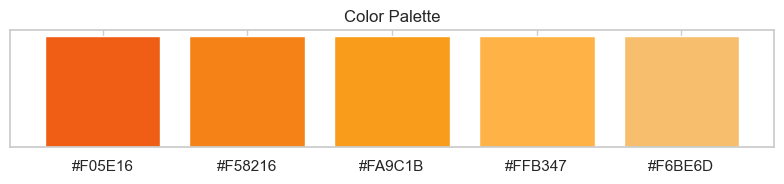

In [131]:
color_palette = ['#F05E16', '#F58216', '#FA9C1B','#FFB347' ,  '#F6BE6D',]
plt.figure(figsize=(8, 2))
for i, color in enumerate(color_palette):
    plt.bar(i, height=1, color=color)

plt.xticks(range(len(color_palette)), color_palette, rotation=45)
plt.yticks([]) 
plt.title("Color Palette")
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

### EDA

<Axes: >

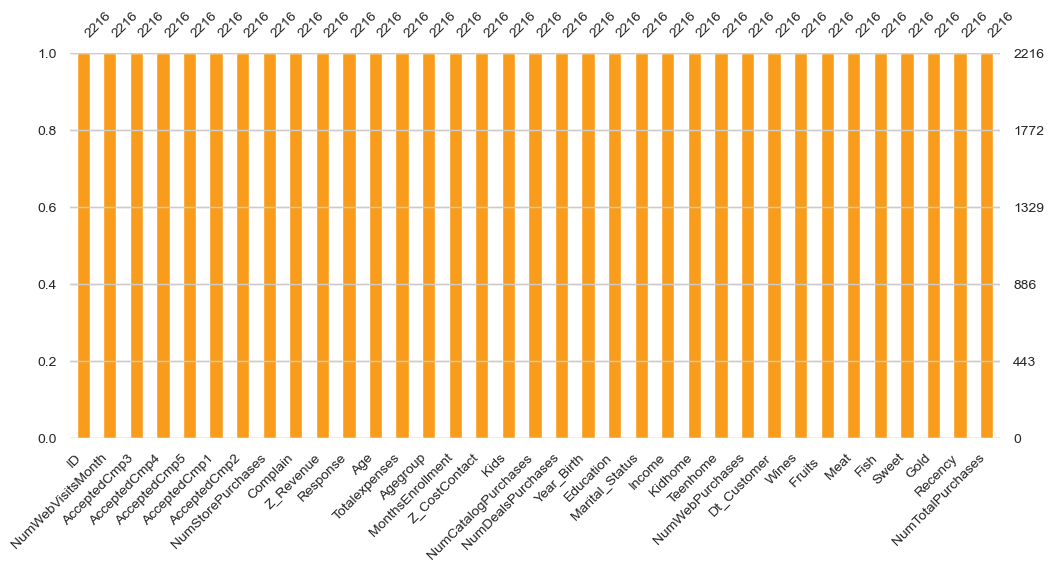

In [132]:
msno.bar(df, color="#FA9C1B", sort="ascending", figsize=(12,5), fontsize=10)

Text(0.5, 1.0, 'Age without outliers')

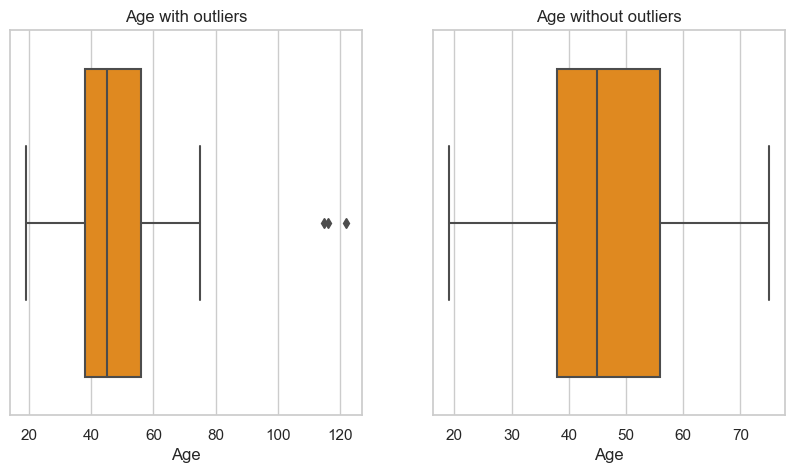

In [133]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot(x = df['Age'],palette = ['#ff8c00'])
plt.title('Age with outliers')

df = df[df['Age']<100]
plt.subplot(1,2,2)

sns.boxplot(x=df['Age'],palette = ['#ff8c00'])
plt.title('Age without outliers')

### . Removing outliers in income

C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\1177743916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['Income'],color='orange' )
C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\1177743916.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['Income'],color = 'orange')


Text(0.5, 1.0, 'Income without outliers')

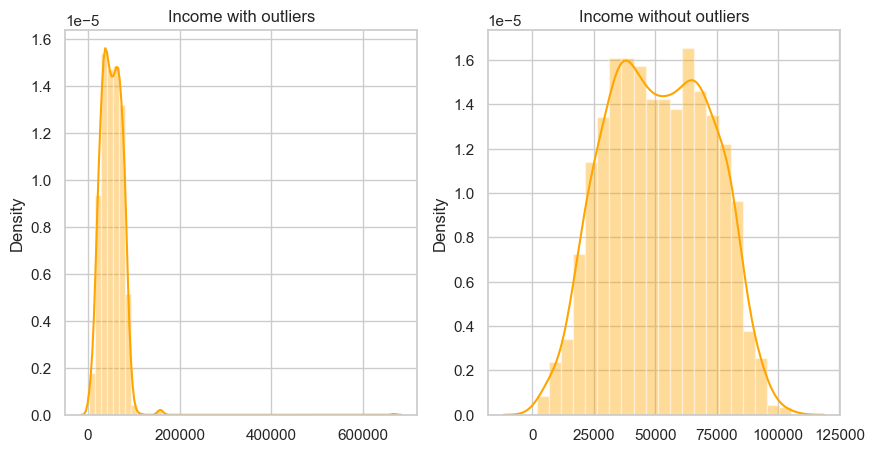

In [134]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(x = df['Income'],color='orange' )
plt.title('Income with outliers')

df = df[df['Income']<110000]
plt.subplot(1,2,2)
sns.distplot(x = df['Income'],color = 'orange')
plt.title('Income without outliers')


Text(0.5, 1.0, 'Count Age groups')

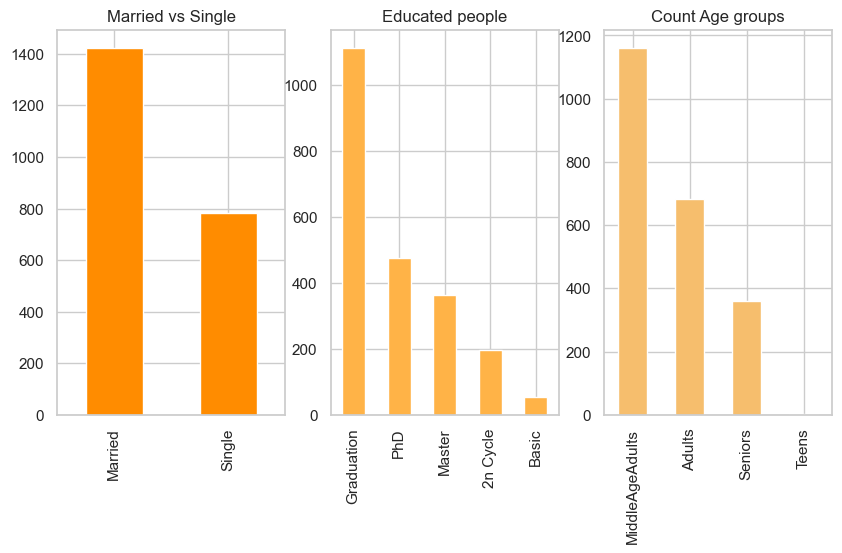

In [135]:
plt.figure(figsize = (10,5))
sns.set(style = 'whitegrid')
plt.subplot(1,3,1)
df['Marital_Status'].value_counts().plot(kind = 'bar',color ='#ff8c00')
plt.title('Married vs Single')
plt.subplot(1,3,2)
df['Education'].value_counts().plot(kind = 'bar',color ='#FFB347' )
plt.title('Educated people')
plt.subplot(1,3,3)
df['Agegroup'].value_counts().plot(kind = 'bar',color ='#F6BE6D')
plt.title('Count Age groups')

#### .Married people is more than compared with single
#### . In the data Graduated people are more and basic educated people are less
#### . The Age group of Middle age adults are more 

In [136]:

martial_group = df.groupby('Marital_Status').agg(TotalRecords =('Marital_Status','size'),
                                                 Totalexpenses = ('Totalexpenses','sum'),
                                                 AvgAmount = ('Totalexpenses','mean'))

In [137]:
martial_group.style.background_gradient(cmap='Oranges')

,TotalRecords,Totalexpenses,AvgAmount
Marital_Status,,,
Married,1422,848610,596.772152
Single,782,489155,625.517903


Text(0.5, 1.0, 'The Avgamount of Marital_Status')

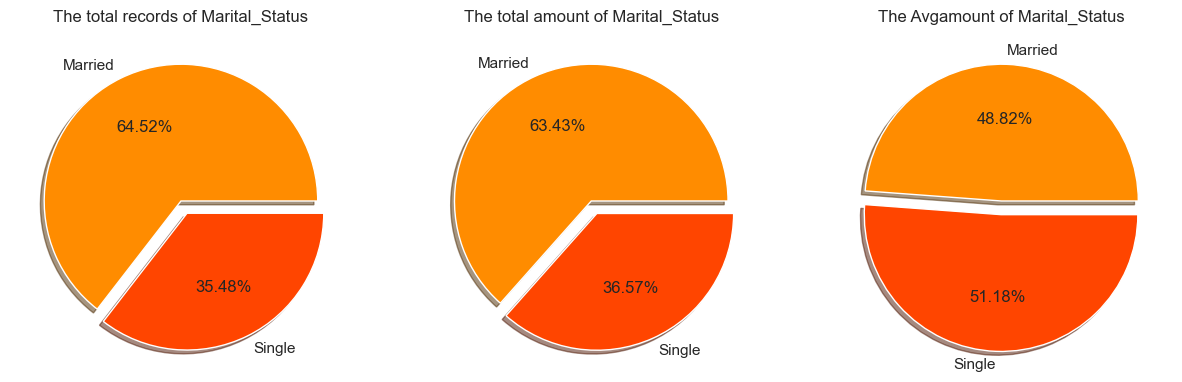

In [138]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
sns.set(style = 'whitegrid')
plt.pie(x=martial_group.TotalRecords,labels=martial_group.index,colors=['#ff8c00','#ff4500'],explode = (0,0.1), autopct = '%.2f%%',shadow = True)
plt.title(f'The total records of {martial_group.index.name}')

plt.subplot(1,3,2)
plt.pie(x=martial_group.Totalexpenses,labels=martial_group.index,colors=['#ff8c00','#ff4500'],explode = (0,0.1),autopct = '%.2f%%',shadow = True)
plt.title(f'The total amount of {martial_group.index.name}')

plt.subplot(1,3,3)
plt.pie(x=martial_group.AvgAmount,labels=martial_group.index,colors=['#ff8c00','#ff4500'],explode = (0,0.1),autopct = '%.2f%%',shadow = True)
plt.title(f'The Avgamount of {martial_group.index.name}')

#### .The married people expenses is more than compared to the single people
#### .The Average expenses of married people is less than compared to the single people

In [139]:
Education_group =  df.groupby('Education').agg(TotalRecords =('Education','size'),
                                                 Totalexpenses = ('Totalexpenses','sum'),
                                                 AvgAmount = ('Totalexpenses','mean'))

In [140]:
Education_group.style.background_gradient(cmap='Oranges')

,TotalRecords,Totalexpenses,AvgAmount
Education,,,
2n Cycle,198,98899,499.489899
Basic,54,4417,81.796296
Graduation,1113,692004,621.746631
Master,364,222506,611.280220
PhD,475,319939,673.555789


Text(0.5, 1.0, 'The Avgamount of Education')

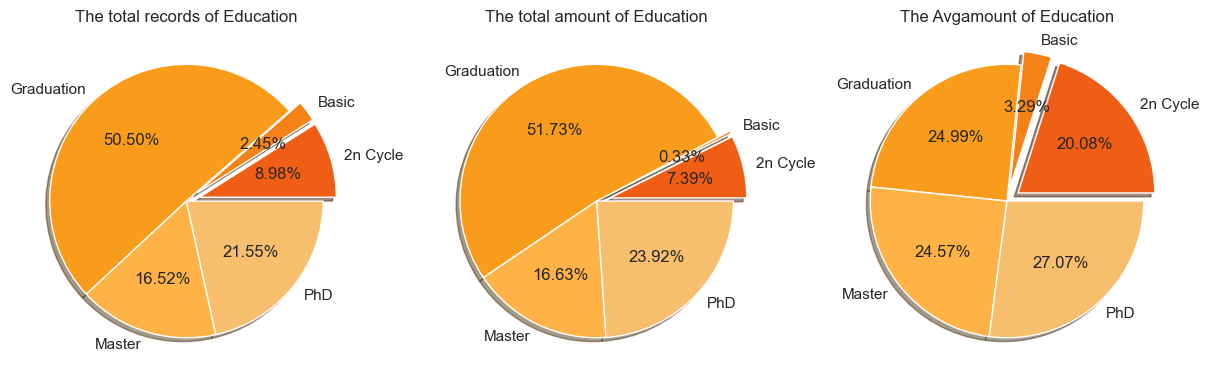

In [141]:
plt.figure(figsize = (15,15))
sns.set(style = 'whitegrid')
plt.subplot(1,3,1)
plt.pie(x=Education_group.TotalRecords,labels=Education_group.index,colors = color_palette,explode = (0.1,0.1,0,0,0),autopct = '%.2f%%',shadow = True)
plt.title(f'The total records of {Education_group.index.name}')

plt.subplot(1,3,2)
plt.pie(x=Education_group.Totalexpenses,labels=Education_group.index,colors = color_palette, explode = (0.1,0.1,0,0,0),autopct = '%.2f%%',shadow = True)
plt.title(f'The total amount of {Education_group.index.name}')

plt.subplot(1,3,3)
plt.pie(x=Education_group.AvgAmount,labels=Education_group.index,colors = color_palette,explode = (0.1,0.1,0,0,0),autopct = '%.2f%%',shadow = True)
plt.title(f'The Avgamount of {Education_group.index.name}')

#### . The total expenses by educated people are people with graduation are more is followed by phd ,master , 2nd cycle, basic
#### . The average expenses by educated people are people with PhD are more is followed by graduation,master,2nd cycle

In [142]:
Age_Group = df.groupby('Agegroup').agg(TotalRecords =('Agegroup','size'),
                                                 TotalAmount = ('Totalexpenses','sum'),
                                                 AvgAmount = ('Totalexpenses','mean'))

In [143]:
Age_Group.style.background_gradient(cmap='Oranges')

,TotalRecords,TotalAmount,AvgAmount
Agegroup,,,
Adults,683,368194,539.083455
MiddleAgeAdults,1160,700998,604.308621
Seniors,359,268435,747.729805
Teens,2,138,69.000000


Text(0.5, 1.0, 'The Avgamount of Agegroup')

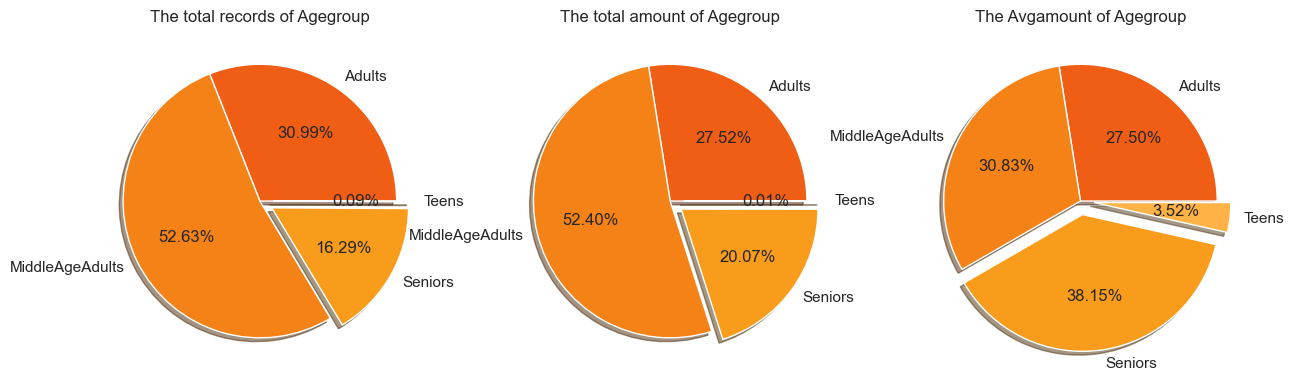

In [144]:
plt.figure(figsize = (15,15))
sns.set(style = 'whitegrid')
plt.subplot(1,3,1)
plt.pie(x=Age_Group.TotalRecords,labels=Age_Group.index,autopct = '%.2f%%',shadow = True,colors = color_palette,explode = [0,0,0.1,0.1])
plt.title(f'The total records of {Age_Group.index.name}')

plt.subplot(1,3,2)
plt.pie(x=Age_Group.TotalAmount,labels=Age_Group.index,colors = color_palette,autopct = '%.2f%%',explode = [0,0,0.1,0.1],shadow = True)
plt.title(f'The total amount of {Age_Group.index.name}')

plt.subplot(1,3,3)
plt.pie(x=Age_Group.AvgAmount,labels=Age_Group.index,colors = color_palette,autopct = '%.2f%%',explode = [0,0,0.1,0.1],shadow = True)
plt.title(f'The Avgamount of {Age_Group.index.name}')

#### The total expenses of Middleage adult are more is followed by Adults , Seniors
#### The average expenses made by Seniors are more in number is followed by Middle age adults,adults

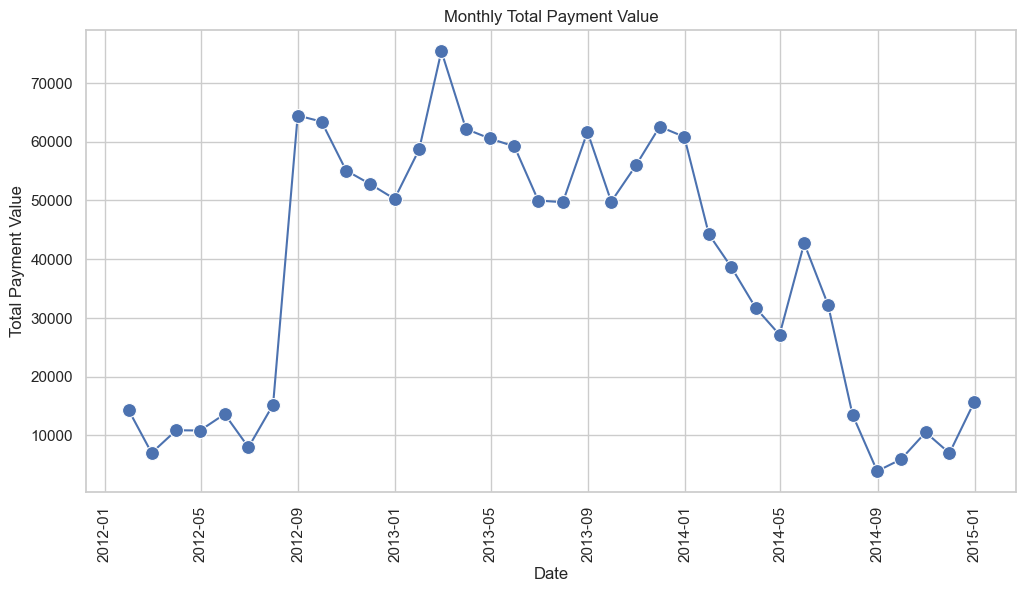

In [217]:
monthly_sum = df.set_index('Dt_Customer')['Totalexpenses'].resample('M').sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sum.index, y=monthly_sum.values, marker='o', markersize=10, color='b')

plt.title('Monthly Total Payment Value') 
plt.xlabel('Date')
plt.ylabel('Total Payment Value')
plt.xticks(rotation=90)
plt.show()

In [240]:
camp_1 = df.groupby('Year')['AcceptedCmp1'].sum()
camp_2 = df.groupby('Year')['AcceptedCmp2'].sum()
camp_3 = df.groupby('Year')['AcceptedCmp3'].sum()
camp_4 = df.groupby('Year')['AcceptedCmp4'].sum()
camp_5 = df.groupby('Year')['AcceptedCmp5'].sum()


In [256]:
df['Total Aceepted Cmp'] = df['AcceptedCmp1']+df['AcceptedCmp2'] +df['AcceptedCmp3'] +df['AcceptedCmp4'] +df['AcceptedCmp5']

In [257]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totalexpenses,Agegroup,MonthsEnrollment,Kids,NumTotalPurchases,Year,Total Aceepted Cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617,MiddleAgeAdults,33,0,25,2012,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27,Seniors,5,2,6,2014,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,776,MiddleAgeAdults,17,0,21,2013,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,53,Adults,3,1,8,2014,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422,Adults,12,1,19,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48,1341,MiddleAgeAdults,19,1,18,2013,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69,444,Seniors,3,3,22,2014,1
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34,1241,Adults,12,0,19,2014,1
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59,843,MiddleAgeAdults,12,1,23,2014,0


In [146]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits  ', 'Meat',
       'Fish', 'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Totalexpenses', 'Agegroup', 'MonthsEnrollment', 'Kids',
       'NumTotalPurchases'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\3825015629.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Agegroup'],y=df['Totalexpenses'],hue=df['Education'],palette = color_palette,ci=None)


<Axes: xlabel='Agegroup', ylabel='Totalexpenses'>

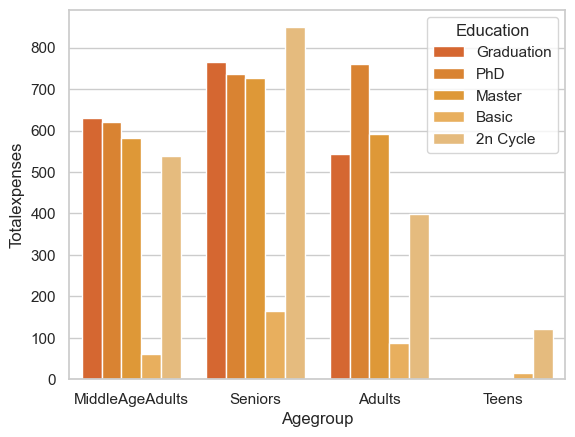

In [147]:
sns.barplot(x=df['Agegroup'],y=df['Totalexpenses'],hue=df['Education'],palette = color_palette,ci=None)

#### In all the above Agegroups the people with graduation make good number of expenses
#### People with seniority and education is about 2nd cycle are made highest number of expenses
#### People with PhD are make good number of expenses after the Graduated people

C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\3452630716.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  income_vs_age = sns.lineplot(x="Age", y="Income", data=df, ci=None,color = '#ff4500')


<Axes: title={'center': 'Income vs Age'}, xlabel='Age', ylabel='Income'>

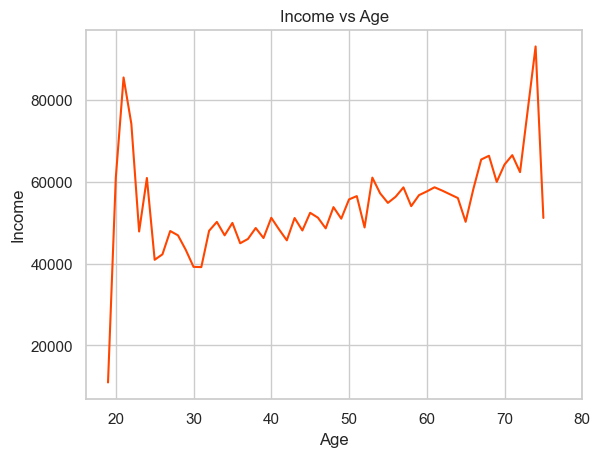

In [148]:
income_vs_age = sns.lineplot(x="Age", y="Income", data=df, ci=None,color = '#ff4500')
income_vs_age.set(xlim=(None, 80), title='Income vs Age')
income_vs_age

#### . People between the age of 30 t0 50 who are middle age people their income lies between 40K to 60K

<Axes: title={'center': 'Income vs Expenditure on Wine based on Education'}, xlabel='Income', ylabel='Wines'>

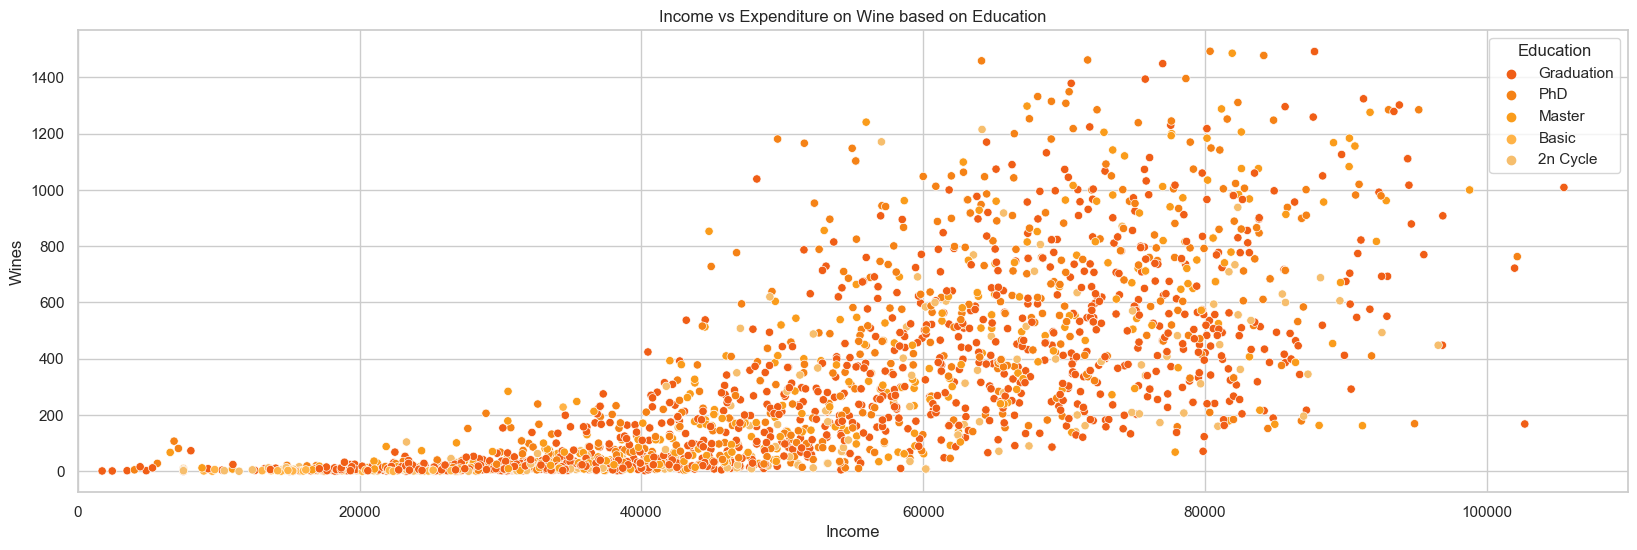

In [206]:
plt.figure(figsize=(20,6))
edu_vs_wine = sns.scatterplot(x="Income", y="Wines", data=df, hue="Education",palette = color_palette)
edu_vs_wine.set(xlim=(0, 110000), title="Income vs Expenditure on Wine based on Education")
edu_vs_wine
     


#### . People with Graduation expended more on wines most of these people having income of 20k to 80k

In [258]:
df 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totalexpenses,Agegroup,MonthsEnrollment,Kids,NumTotalPurchases,Year,Total Aceepted Cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617,MiddleAgeAdults,33,0,25,2012,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27,Seniors,5,2,6,2014,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,776,MiddleAgeAdults,17,0,21,2013,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,53,Adults,3,1,8,2014,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422,Adults,12,1,19,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48,1341,MiddleAgeAdults,19,1,18,2013,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69,444,Seniors,3,3,22,2014,1
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34,1241,Adults,12,0,19,2014,1
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59,843,MiddleAgeAdults,12,1,23,2014,0


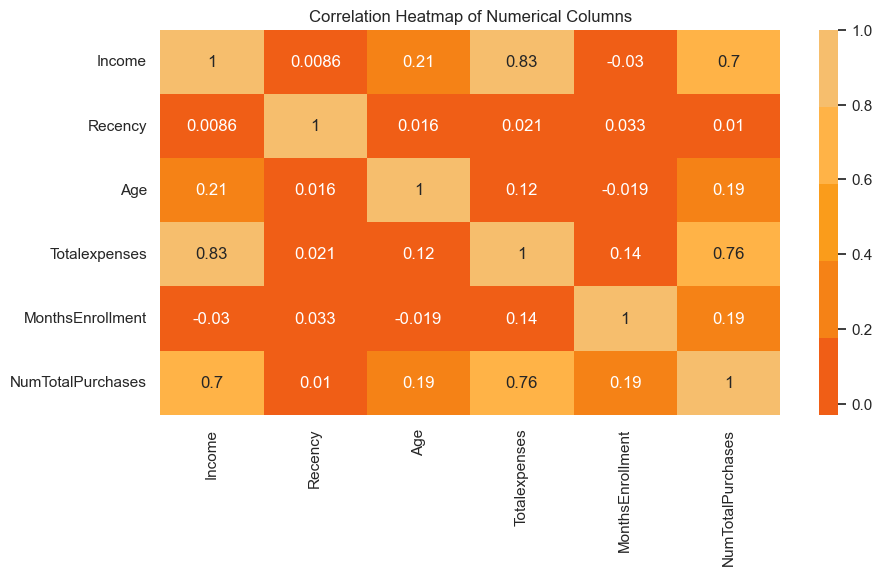

In [151]:
plt.figure(figsize=(10, 5))  # Adjust the figsize as per your preference
numerical_columns = ['Income', 'Recency', 'Age', 'Totalexpenses', 'MonthsEnrollment', 'NumTotalPurchases']
correlation_matrix = df[numerical_columns].corr()
cmap = sns.color_palette(color_palette)  # Use a color palette name like "coolwarm"
sns.heatmap(correlation_matrix, cmap=cmap, annot=True)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#### . People with Graduation and their is between 20K to 60K they expenses is more on wines


In [152]:
import sklearn
from sklearn.model_selection import train_test_split



from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,PowerTransformer,RobustScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from category_encoders import BinaryEncoder
from category_encoders import LeaveOneOutEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [259]:
df_M = df[['Income', 'Recency','Age','Totalexpenses','MonthsEnrollment','NumTotalPurchases','Education','Marital_Status','Agegroup','Total Aceepted Cmp']]

In [260]:
df_M

,Income,Recency,Age,Totalexpenses,MonthsEnrollment,NumTotalPurchases,Education,Marital_Status,Agegroup,Total Aceepted Cmp
0,58138.0,58,58,1617,33,25,Graduation,Single,MiddleAgeAdults,0
1,46344.0,38,61,27,5,6,Graduation,Single,Seniors,0
2,71613.0,26,50,776,17,21,Graduation,Married,MiddleAgeAdults,0
3,26646.0,26,31,53,3,8,Graduation,Married,Adults,0
4,58293.0,94,34,422,12,19,PhD,Married,Adults,0
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,48,1341,19,18,Graduation,Married,MiddleAgeAdults,0
2236,64014.0,56,69,444,3,22,PhD,Married,Seniors,1
2237,56981.0,91,34,1241,12,19,Graduation,Single,Adults,1
2238,69245.0,8,59,843,12,23,Master,Married,MiddleAgeAdults,0


In [262]:
x = df_M.copy()

In [263]:
x

,Income,Recency,Age,Totalexpenses,MonthsEnrollment,NumTotalPurchases,Education,Marital_Status,Agegroup,Total Aceepted Cmp
0,58138.0,58,58,1617,33,25,Graduation,Single,MiddleAgeAdults,0
1,46344.0,38,61,27,5,6,Graduation,Single,Seniors,0
2,71613.0,26,50,776,17,21,Graduation,Married,MiddleAgeAdults,0
3,26646.0,26,31,53,3,8,Graduation,Married,Adults,0
4,58293.0,94,34,422,12,19,PhD,Married,Adults,0
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,48,1341,19,18,Graduation,Married,MiddleAgeAdults,0
2236,64014.0,56,69,444,3,22,PhD,Married,Seniors,1
2237,56981.0,91,34,1241,12,19,Graduation,Single,Adults,1
2238,69245.0,8,59,843,12,23,Master,Married,MiddleAgeAdults,0


In [267]:
x,y = df_M.drop(columns= ['Totalexpenses']),df['Totalexpenses']
xCat , xCont = df_M[['Education','Marital_Status','Agegroup']] ,df_M[['Income','Recency','Age','Totalexpenses','MonthsEnrollment','NumTotalPurchases']]

In [268]:
df_M['Totalexpenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Totalexpenses, Length: 2216, dtype: int64

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
xTrain,xTest,yTrain , yTest = train_test_split(x,y,test_size=0.37,random_state=23)

In [271]:
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

((1396, 9), (820, 9), (1396,), (820,))

In [272]:
catcolsNominal = ['Marital_Status']
catcolsOrdinalEducation= ['Education']
catcolsOrdinalAgegroup = ['Agegroup']

contcols = ['Income','Recency','Age','MonthsEnrollment','NumTotalPurchases']

In [273]:
catNominalpipeline = Pipeline (steps = [('embarkImputation',SimpleImputer(strategy='most_frequent')),
                                ('oneHotEncoding',OneHotEncoder(sparse_output = False,drop ='first'))
                    
                                ])

In [274]:
catOrdinalpipeline = Pipeline (steps=[
    ('ordImputation',SimpleImputer(strategy='most_frequent')),
    ('ordEncoding',OrdinalEncoder(categories=[['Basic','2n Cycle','Graduation','Master','PhD']])),

    
])

In [275]:
contPipeline = Pipeline (steps = [
    ('embarkImputation',SimpleImputer(strategy='mean')),
    ('robustScaler',RobustScaler()),
    ('yeoJohnson',PowerTransformer())
])   


In [276]:
preColTrans = ColumnTransformer(transformers = [
    ('contPipeline',contPipeline,contcols),
    ('catOrdinalPipeline_Education',catOrdinalpipeline,catcolsOrdinalEducation),
    ('catNominalPipeline',catNominalpipeline,catcolsNominal),
    ('odinalencoding_Agegroup',OrdinalEncoder(categories=[['Teens','Adults','MiddleAgeAdults','Seniors']]),['Agegroup'])
    ],remainder = 'passthrough')

In [277]:
preColTrans  

ColumnTransformer(remainder='passthrough',
                  transformers=[('contPipeline',
                                 Pipeline(steps=[('embarkImputation',
                                                  SimpleImputer()),
                                                 ('robustScaler',
                                                  RobustScaler()),
                                                 ('yeoJohnson',
                                                  PowerTransformer())]),
                                 ['Income', 'Recency', 'Age',
                                  'MonthsEnrollment', 'NumTotalPurchases']),
                                ('catOrdinalPipeline_Education',
                                 Pipeline(steps=[('ordImputation',
                                                  SimpleImputer(strategy='m...
                                                                              'Graduation',
                                                                              'Master',
                                                                              'PhD']]))]),
                                 ['Education']),
                                ('catNominalPipeline',
                                 Pipeline(steps=[('embarkImputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Marital_Status']),
                                ('odinalencoding_Agegroup',
                                 OrdinalEncoder(categories=[['Teens', 'Adults',
                                                             'MiddleAgeAdults',
                                                             'Seniors']]),
                                 ['Agegroup'])])

In [278]:
df['Agegroup'].value_counts()

MiddleAgeAdults    1163
Adults              687
Seniors             364
Teens                 2
Name: Agegroup, dtype: int64

In [279]:
finalpipeline = Pipeline(steps=[
    ('final',preColTrans),
    ('knr',KNeighborsRegressor())
])

In [280]:
finalpipeline

Pipeline(steps=[('final',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('contPipeline',
                                                  Pipeline(steps=[('embarkImputation',
                                                                   SimpleImputer()),
                                                                  ('robustScaler',
                                                                   RobustScaler()),
                                                                  ('yeoJohnson',
                                                                   PowerTransformer())]),
                                                  ['Income', 'Recency', 'Age',
                                                   'MonthsEnrollment',
                                                   'NumTotalPurchases']),
                                                 ('catOrdinalPipeline_Education',
                                                  Pipeline(steps=[('ordImputation',...
                                                  ['Education']),
                                                 ('catNominalPipeline',
                                                  Pipeline(steps=[('embarkImputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHotEncoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Marital_Status']),
                                                 ('odinalencoding_Agegroup',
                                                  OrdinalEncoder(categories=[['Teens',
                                                                              'Adults',
                                                                              'MiddleAgeAdults',
                                                                              'Seniors']]),
                                                  ['Agegroup'])])),
                ('knr', KNeighborsRegressor())])

#### . knn Regression

In [281]:
finalpipeline.fit(xTrain,yTrain)
ypred = finalpipeline.predict(xTest)
r2_score(yTest,ypred)

0.7716208483171876

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

#### . Linear regression

In [283]:
finalpipeline = Pipeline(steps=[
    ('final',preColTrans),
    ('lr',LinearRegression())
])

In [284]:
finalpipeline.fit(xTrain,yTrain)
ypred = finalpipeline.predict(xTest)
r2_score(yTest,ypred)

0.6670223128798006

In [285]:
finalpipeline.fit(xTrain,yTrain)
ytrainPred=finalpipeline.predict(xTrain)
ytestPred=finalpipeline.predict(xTest)

r2score_train = r2_score(yTrain,ytrainPred)
r2_lineart_train= 1-(1-r2score_train)*((len(xTrain)-1)/(len(xTrain)-len(xTrain.columns)-1))

r2score_test = r2_score(yTest,ytestPred)
r2_lineart_test= 1-(1-r2score_test)*((len(xTest)-1)/(len(xTest)-len(xTest.columns)-1))
r2_lineart_train,r2_lineart_test

(0.7513775601924847, 0.6633225608006873)

In [286]:
pd.DataFrame({'real':yTrain,'predict':ytrainPred})

,real,predict
1045,122,211.235714
1195,908,964.015586
1135,326,508.100118
2168,1479,1622.768127
719,21,75.409869
...,...,...
1529,55,-122.184937
2010,1870,916.890655
1077,22,-27.860317
755,1006,1036.207267


In [287]:
pd.DataFrame({'real':yTest,'predict':ytestPred})

,real,predict
789,377,611.149587
1355,861,1069.164486
1240,21,-68.558422
610,268,145.164195
1424,60,-195.670300
...,...,...
1572,2525,1306.546938
99,410,618.178308
156,306,561.348630
381,22,-218.857617


#### . Decision tree regression

In [288]:
finalpipeline = Pipeline(steps=[
    ('final',preColTrans),
    ('DT',DecisionTreeRegressor())
])

In [289]:
finalpipeline.fit(xTrain,yTrain)
ypred = finalpipeline.predict(xTest)
r2_score(yTest,ypred)

0.7316441335408614

#### . Logistic Regression

In [290]:
finalpipeline = Pipeline(steps=[
    ('final',preColTrans),
    ('logr',LogisticRegression())
])

In [291]:
finalpipeline.fit(xTrain,yTrain)
ypred = finalpipeline.predict(xTest)
r2_score(yTest,ypred)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6017142071447553

In [292]:
a = {'knn':0.7508452611289693,
                  'linearregression': 0.7543745881091688,
                  'decisiontree': 0.697549412813778,
                  'logistic': 0.6101988844273487
    }

In [293]:
pd.Series([0.7508452611289693,
                  0.7543745881091688,
                   0.697549412813778,
                  0.6101988844273487])

0    0.750845
1    0.754375
2    0.697549
3    0.610199
dtype: float64

In [295]:
a.keys()

dict_keys(['knn', 'linearregression', 'decisiontree', 'logistic'])

In [296]:
accuracy_scores = {
    'knn': 0.7508452611289693,
    'linearregression': 0.7543745881091688,
    'decisiontree': 0.697549412813778,
    'logistic': 0.6101988844273487
}

In [297]:
df_R2 = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

In [298]:
df_R2

,Model,Accuracy
0,knn,0.750845
1,linearregression,0.754375
2,decisiontree,0.697549
3,logistic,0.610199


<Axes: xlabel='Model', ylabel='Accuracy'>

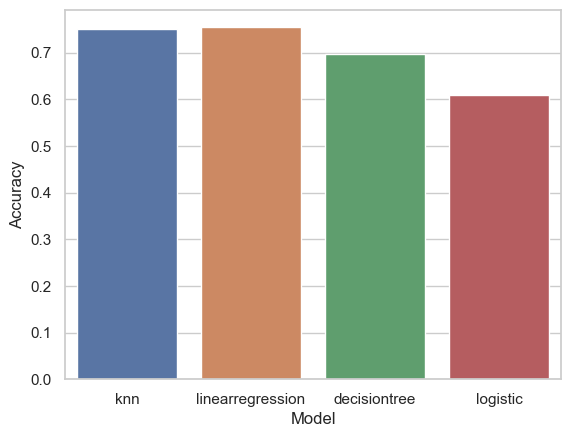

In [299]:

sns.barplot(data = df_R2 ,y=df_R2['Accuracy'],x = df_R2['Model'])

In [300]:
df_M

,Income,Recency,Age,Totalexpenses,MonthsEnrollment,NumTotalPurchases,Education,Marital_Status,Agegroup,Total Aceepted Cmp
0,58138.0,58,58,1617,33,25,Graduation,Single,MiddleAgeAdults,0
1,46344.0,38,61,27,5,6,Graduation,Single,Seniors,0
2,71613.0,26,50,776,17,21,Graduation,Married,MiddleAgeAdults,0
3,26646.0,26,31,53,3,8,Graduation,Married,Adults,0
4,58293.0,94,34,422,12,19,PhD,Married,Adults,0
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,48,1341,19,18,Graduation,Married,MiddleAgeAdults,0
2236,64014.0,56,69,444,3,22,PhD,Married,Seniors,1
2237,56981.0,91,34,1241,12,19,Graduation,Single,Adults,1
2238,69245.0,8,59,843,12,23,Master,Married,MiddleAgeAdults,0


In [304]:
df_C = df[['Income','Age','Total Aceepted Cmp','Education','Totalexpenses','Kids','Marital_Status','NumTotalPurchases']]

In [311]:
cate = []
for i in df_C.columns:
    if (df_C[i].dtypes == "object"):
        cate.append(i)
print(" Object are:",cate)

 Object are: ['Education', 'Marital_Status']


In [312]:
Int = []
for i in df_C.columns:
    if (df_C[i].dtypes == "int64"):
        Int.append(i)
print(" Integers are:",Int)

 Integers are: ['Age', 'Total Aceepted Cmp', 'Totalexpenses', 'Kids', 'NumTotalPurchases']


In [315]:
Float = []
for i in df_C.columns:
    if (df_C[i].dtypes == "float64"):
        Float.append(i)
print("Float are:",Float)

Float are: ['Income']


In [317]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df_C[i]=df_C[[i]].apply(lbl_encode.fit_transform)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\751596866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C[i]=df_C[[i]].apply(lbl_encode.fit_transform)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10396\751596866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C[i]=df_C[[i]].apply(lbl_encode.fit_transform)


In [318]:
df1 = df_C.copy()

In [320]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [321]:
sf_df.head().style.background_gradient(cmap='Greys')

,Income,Age,Total Aceepted Cmp,Education,Totalexpenses,Kids,Marital_Status,NumTotalPurchases
0,0.234063,0.986443,-0.439265,-0.350527,1.675488,-1.264803,1.348829,1.319446
1,-0.234559,1.236801,-0.439265,-0.350527,-0.962358,1.405806,1.348829,-1.157987
2,0.769478,0.318822,-0.439265,-0.350527,0.280250,-1.264803,-0.741384,0.797881
3,-1.017239,-1.266777,-0.439265,-0.350527,-0.919224,0.070501,-0.741384,-0.897205
4,0.240221,-1.016420,-0.439265,1.429011,-0.307044,0.070501,-0.741384,0.537099


In [322]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 1.31944644 -0.35052725]
 [-1.15798724 -0.35052725]
 [ 0.79788146 -0.35052725]
 ...
 [ 0.53709896 -0.35052725]
 [ 1.05866395  0.53924181]
 [-0.50603101  1.42901088]]


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

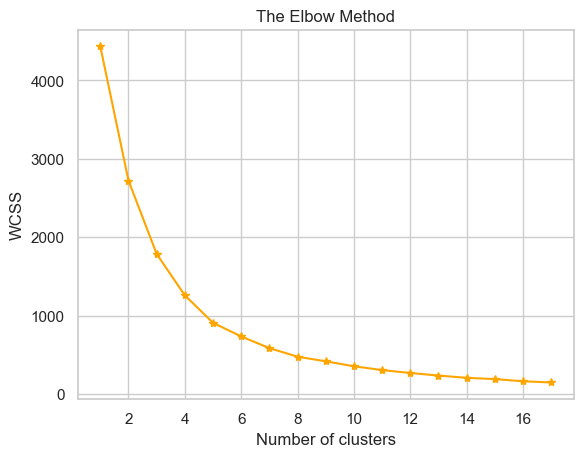

In [324]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "orange",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [325]:
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


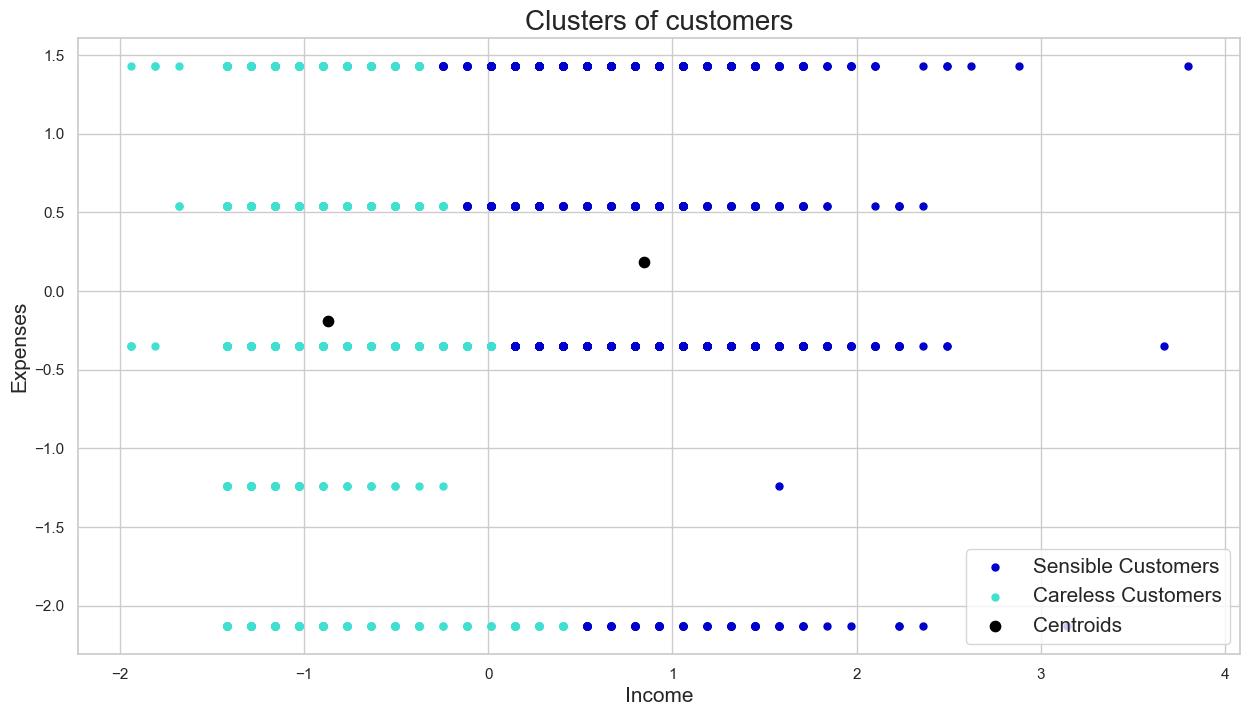

In [326]:
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()